<a href="https://colab.research.google.com/github/bigdata210/Python/blob/main/yse/python230417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlib + seaborn
- 참고 블로그 : https://jehyunlee.github.io/2020/08/27/Python-DS-28-mpl_spines_grids/
- google.colab : Spines&Grids 내용


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
def major_formatter(x, pos):   # pos : 내부적으로 알아서 돌아가는 메서드
  return "%.2f$" % x
  # 4.0 -> 4.0$
formatter = FuncFormatter(major_formatter)

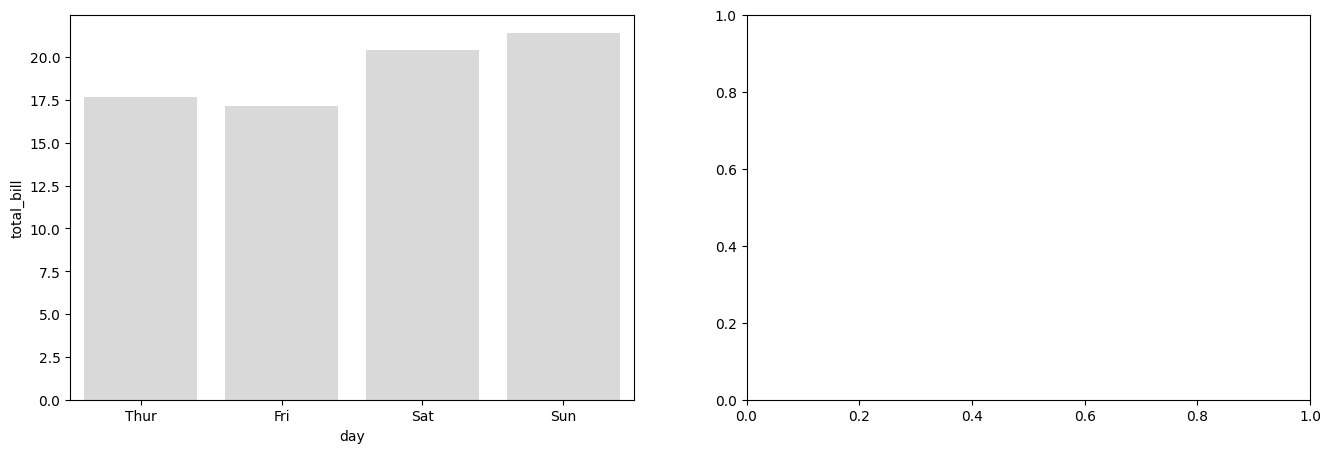

In [ ]:
fig, ax = plt.subplots(nrows =1, ncols =2, figsize=(16,5))
sns.barplot(x = 'day' 
            , y ='total_bill'
            , data = tips
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0]
            )


plt.show()

In [ ]:
# groupby를 이용하여 평균값이 높은 것에 강조
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
print(group_mean)

# 요일 중 정렬하여 가장 높은 값(index[0])
h_day = group_mean.sort_values(ascending = False).index[0]
#print(h_day)
# 평균값 중 정렬하여 가장 높은 값
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)
print(h_mean)

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64
21.41


- 색 변경 : https://color.adobe.com/ko/create
- 용어 설명 : https://matplotlib.org/stable/api/spines_api.html#matplotlib.spines.Spine.set_position

Sun 21.41


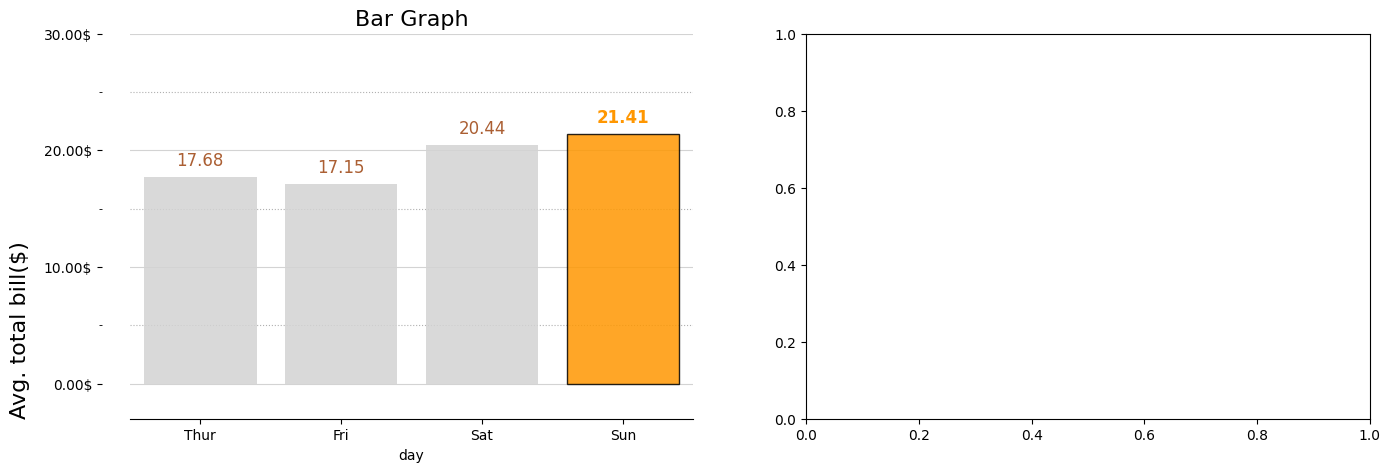

In [ ]:
fig, ax = plt.subplots(nrows =1, ncols =2, figsize=(16,5))
ax0 = sns.barplot(x = 'day' 
            , y ='total_bill'
            , data = tips
            , errorbar = None
            , color = 'lightgray'
            , alpha = 0.85
            , ax = ax[0]
            , zorder = 2   # grid가 막대그래프 뒤로 나오게 함.
            )

h_day = group_mean.sort_values(ascending = False).index[0]
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)
print(h_day, h_mean)

for p in ax0.patches:
  fontweight = 'normal'
  color = '#AB5F33'
  height = np.round(p.get_height(),2)
  #print(height)
  if h_mean == height:
    fontweight = 'bold'
    color = '#FF9701'
    p.set_facecolor(color)
    p.set_edgecolor('black')

  ax0.text(p.get_x() + p.get_width()/2.,
             height+1,
             height,
             ha = 'center',
             size = 12,
             fontweight = fontweight,
             color = color)
  
#ax0.set_ylim(-3,h_mean+5)
ax0.set_ylim(-3,30)
ax0.set_title("Bar Graph", size =16 )

# 축 제거 
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)

# set_position method 확인해보기
# why? tuple 형식으로 받아야 하므로 이중 괄호 사용
# set_position : 0과 x축 사이 거리 
ax0.spines['left'].set_position(("outward", 20))
# 'outward' 반대의 경우 거리를 음수로 사용


# y축 단위 
ax0.yaxis.set_major_locator(MultipleLocator(10))
# formatter 소숫점 두자리까지 나옴.
ax0.yaxis.set_major_formatter(formatter)
# y축의 범위 
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# labelpad : y축 제목과 y축 범위 사이의 거리
# loc : y축 제목의 위치
ax0.set_ylabel('Avg. total bill($)', fontsize = 16, labelpad=10.0, loc = "bottom")

# y축 줄 긋기
ax0.grid(axis="y", which="major", color="lightgray")
# ls = ":" : 라인스타일을 점표시로 변경 
ax0.grid(axis="y", which="minor", ls=":")

plt.show()


<ipython-input-61-0f4f176e8008>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,


Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


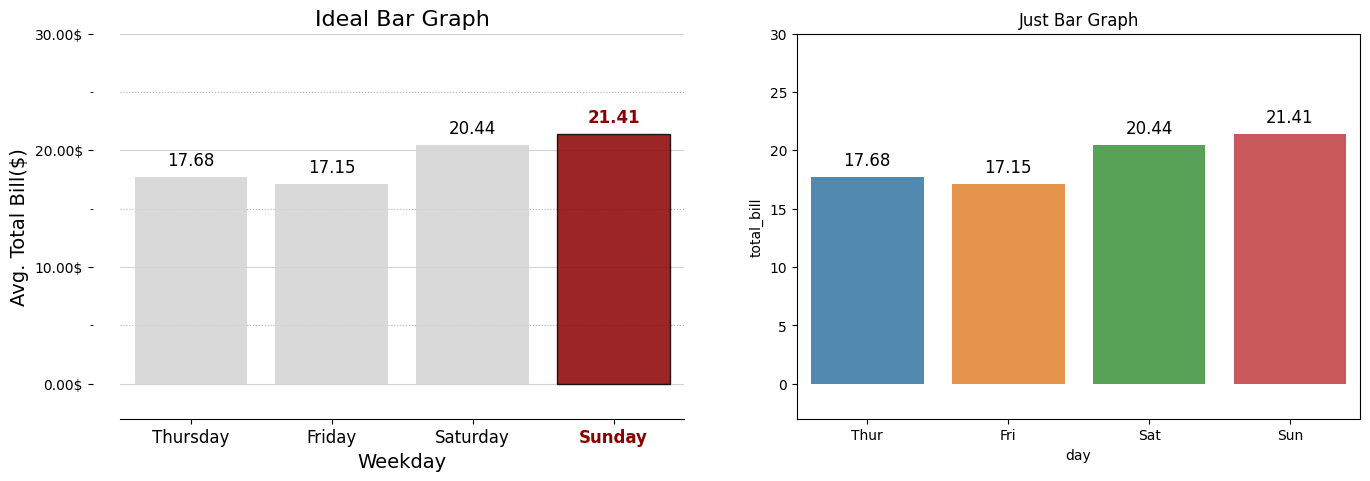

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

# 데이터 불러오기
tips = sns.load_dataset("tips")

# 시각화 객체지향선언
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)
for p in ax0.patches:
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', 
           size=12, 
           fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  errorbar=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

- graph_objects vs express
  + 참고: https://plotly.com/python/graph-objects/

In [ ]:
import plotly
print(plotly.__version__)

5.13.1


In [ ]:
import pandas as pd

df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})
df

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
for contestant, group in df.groupby('Contestant'):
  fig.add_trace(go.Bar(x=group['Fruit'], y=group['Number Eaten'],
                       name = contestant,
                       hovertemplate ="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))

fig.update_layout(title='graph_objects Plot', legend_title_text = 'Contestant')
fig.update_xaxes(title_text ='Fruit')
fig.update_yaxes(title_text = 'Number Eaten')                      
fig.show()

In [ ]:
# express
import plotly.express as px
fig = px.bar(df, x='Fruit', y = 'Number Eaten', 
             color = 'Contestant', barmode ='group')
fig.update_layout(title='Express Chart')

# 반환값이 graph_object -> 상세히 조절 시에는 graph_object로 해야함.
fig.show()

# 선그래프
## 데이터 불러오기
- raw_sales.csv 파일 불러오기

In [ ]:
import pandas as pd
PATH_DATA = "/content/drive/MyDrive/2023/연세IT미래교육원/data/"
PATH_DATA

'/content/drive/MyDrive/2023/연세IT미래교육원/data/'

In [ ]:
# parse_dates = ["datesold"] 
#:datesold의 Dtype은 object인데 이것을 datetime으로 변경함.
raw_sales = pd.read_csv(PATH_DATA +"raw_sales.csv", parse_dates=["datesold"])
raw_sales.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [ ]:
raw_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
# columns : year / year 추출
# groupby 연산, 기준컬럼: year, 대상 컬럼 :  price (평균)
# result 구하기

import numpy as np

# 'year'의 data만 뽑음.
raw_sales['year'] = raw_sales['datesold'].dt.year
#raw_sales.head(1)
print(type(raw_sales))   # pandas의 Dataframe

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> year
2007    522377.21
2008    493814.16
2009    496092.03
2010    559564.81
2011    566715.11
2012    552501.37
2013    553416.30
2014    592653.76
2015    626101.34
2016    635185.31
2017    671880.55
2018    660701.04
2019    634184.22
Name: price, dtype: float64


In [ ]:
# 그래프가 난잡하게 나옴. -> data 가공이 되지 않았음.
# why? datasold 값이 중복되는 값이 많아서 -> line graph는 x축에 중복되는 값이 없어야 함.
import plotly.express as px
fig = px.line(raw_sales, x = "datesold", y="price")
fig.show()

In [ ]:
# raw_sales의 컬럼 year에서 price의 평균가격을 뽑는다.
# Series의 객체 키 값을 반환 (단일 columns)
result = np.round(raw_sales.groupby("year")["price"].agg("mean"),2)
print(type(result), result)

<class 'pandas.core.series.Series'> year
2007    522377.21
2008    493814.16
2009    496092.03
2010    559564.81
2011    566715.11
2012    552501.37
2013    553416.30
2014    592653.76
2015    626101.34
2016    635185.31
2017    671880.55
2018    660701.04
2019    634184.22
Name: price, dtype: float64


In [ ]:
# 딕셔너리로 묶어서 price 평균 가격을 뽑는다.
# DataFrame의 객체 키 값을 반환
agg_dict= {"price":"mean"}
result = np.round(raw_sales.groupby("year").agg(agg_dict),2)
#print(type(result), result)
result

,price
year,
2007,522377.21
2008,493814.16
2009,496092.03
2010,559564.81
2011,566715.11
2012,552501.37
2013,553416.30
2014,592653.76
2015,626101.34


In [ ]:
result = np.round(raw_sales.groupby("year")["price"].agg("mean"),2)
result = pd.DataFrame(result).reset_index()
result

,year,price
0,2007,522377.21
1,2008,493814.16
2,2009,496092.03
3,2010,559564.81
4,2011,566715.11
5,2012,552501.37
6,2013,553416.30
7,2014,592653.76
8,2015,626101.34
9,2016,635185.31


In [ ]:
import plotly.express as px
fig = px.line(result, x = "year", y="price")
fig.show()

In [ ]:
raw_sales.head()
property = raw_sales[raw_sales["propertyType"] == 'house']
#property
property = property.groupby("year")["bedrooms"].agg("mean")
#property
property = pd.DataFrame(property).reset_index()
#property

fig = px.line(property, x ="year", y="bedrooms")
fig.show()

In [ ]:
# 연도별 / 월별 추세
raw_sales.head()
raw_sales['year'] = raw_sales['datesold'].dt.year
raw_sales['month'] = raw_sales['datesold'].dt.month
raw_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   year          29580 non-null  int64         
 6   month         29580 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# 2008년과 2018년 data 비교
# 2008년, 2018년 data 뽑기
#result = raw_sales.loc[(raw_sales['year']== 2008) |
#                      (raw_sales['year'] == 2018)]
#result

# 여러 조건을 넣어줄 때 isin을 사용
result = raw_sales[raw_sales['year'].isin([2008,2018])]
result.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1


In [ ]:
# 연도별, 월별 묶은 후 price의 평균만 뽑는다.
# agg(np.mean) = agg("mean")
result = np.round(result.groupby(['year','month'])
['price'].agg(np.mean).reset_index(),2)
result.head()

,year,month,price
0,2007,2,407500.00
1,2007,3,339333.33
2,2007,4,798000.00
3,2007,5,339500.00
4,2007,6,520333.33


In [ ]:
import plotly.express as px
fig = px.line(result, x = 'month', y='price', 
              color='year', markers=True, symbol="year")

# 뒷배경 변경 및 라인 두께 변경
fig.update_layout(plot_bgcolor ='white')
fig.update_traces(line_width=3)

fig.show()

In [ ]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

## fig 형태
- data
- layout

In [ ]:
import plotly.express as px
#pio.templates.default = "plotly_white"

fig = px.line(result, x = 'month', y='price', 
              color='year', markers=True, symbol="year")
fig.update_layout({
    # dictionary 형태인 이유
    # 딕셔너리 형태로 들어가면 json formatter 형태로 변환
    # json formatter 도 딕셔너리 형태 
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()


# 막대그래프

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.templates.default = 'plotly_white'

# make_subplots : 하나의 이미지안에 여러 plot 그리기
fig = make_subplots(rows=2, 
                    cols=1, 
                    subplot_titles = ("1 Chart","2 Chart"))   # 2행 1열 형태


for i, year in enumerate([2008,2018]):
  data = result[result['year']== year]
  fig.add_trace(go.Bar(x = data["month"] 
                      , y = data["price"]
                      , name=str(year))
                , row = i+1
                , col=1)
   # add_trace : 그래프를 연달아 추가적으로 넣음.


fig.show()

In [ ]:
# 그래프 그려보기 3가지 
# 2008년, 2018년 겹치게, 2008년 따로 2018년 따로 

In [ ]:
raw_sales.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


In [ ]:
# px.box()
# x축 : 2007, 2008, 2009, 2010년
# y축 : price
# propertytype : house, unit
# 이상치가 있으면 이상치 제거
# 이상치 있을 때 없을 때 비교 

result = raw_sales[raw_sales['year'].isin([2007, 2008, 2009, 2010])]
fig = px.box(result, x="year", y="price", color='propertyType')
fig.show()

In [ ]:
# 이상치 제거
result = result[result["price"] <= 2000000]
fig = px.box(result, x="year", y="price", color='propertyType')
fig.show()

# 4그룹 간의 차이분석
# -> 분산 분석